**Projet de** : Georget Kevin & Singier Lucas
<img src="logo.jpg" style="width: 500px;" />


## Récuperer les données

# Imports

In [1000]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )


## Analyser les données

In [1001]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   music_id                320 non-null    int64  
 1   chroma_0_mean           317 non-null    float64
 2   chroma_0_std            317 non-null    float64
 3   chroma_10_mean          317 non-null    float64
 4   chroma_10_std           317 non-null    float64
 5   chroma_11_mean          318 non-null    float64
 6   chroma_11_std           320 non-null    float64
 7   chroma_1_mean           318 non-null    float64
 8   chroma_1_std            319 non-null    float64
 9   chroma_2_mean           316 non-null    float64
 10  chroma_2_std            317 non-null    float64
 11  chroma_3_mean           318 non-null    float64
 12  chroma_3_std            313 non-null    float64
 13  chroma_4_mean           316 non-null    float64
 14  chroma_4_std            316 non-null    fl

In [1002]:
df_train.describe()

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std,category
count,320.000000,317.000000,317.000000,317.000000,317.000000,318.000000,320.000000,318.000000,319.000000,316.000000,...,317.000000,319.000000,318.000000,316.000000,316.000000,320.000000,316.000000,316.000000,317.000000,320.000000
mean,159.500000,461.223799,727.558402,441.424764,664.515463,420.808596,606.042905,417.116685,605.835885,469.942682,...,0.629552,4.917406,28.050904,-0.155241,1.737679,1180.002741,1942.502831,192.060511,115.472340,1.500000
std,92.520268,302.890638,511.932682,286.127709,507.650090,284.887311,443.484753,269.444492,410.002545,319.000592,...,0.170709,2.537782,16.103779,0.185176,1.063592,711.314460,1984.500644,107.853027,53.495612,1.119785
min,0.000000,52.542076,108.190132,66.789970,129.553772,64.062683,117.359634,50.826832,93.769897,50.655052,...,0.405036,0.366504,1.656318,-0.650820,0.351351,21.491228,41.709451,35.199924,32.996641,0.000000
25%,79.750000,254.774170,388.372406,248.708359,350.873505,231.128601,344.294373,228.390095,353.000809,258.015579,...,0.515947,3.048645,16.354873,-0.287891,0.958037,687.719298,626.473435,114.992507,78.780289,0.750000
50%,159.500000,377.393036,571.490845,381.081177,534.109131,340.970337,484.871140,354.934341,505.056274,403.037384,...,0.583850,4.731231,24.205491,-0.086321,1.461911,1020.833333,1274.624056,167.636659,104.338107,1.500000
75%,239.250000,592.239685,910.419189,558.673584,803.034241,506.674622,752.747421,507.147308,702.858398,568.195679,...,0.683956,6.615188,37.958948,0.002296,2.144044,1552.741228,2634.940367,240.335595,142.303996,2.250000
max,319.000000,1643.472900,3421.152100,2172.719482,4360.215332,2302.835205,5054.364258,1829.826904,3210.021484,2502.509033,...,1.771815,14.466579,86.371120,0.074635,6.510337,5243.859649,15422.032531,579.817519,406.147341,3.000000


In [1003]:
df_train.isna().sum()

music_id                 0
chroma_0_mean            3
chroma_0_std             3
chroma_10_mean           3
chroma_10_std            3
                        ..
spectral_rolloff_mean    0
spectral_spread_mean     4
zcr_mean                 4
zcr_std                  3
category                 0
Length: 63, dtype: int64

In [1004]:
df_train.shape
df_test.shape

(80, 62)

# Visualisation des données
## Analyser les données
* Identifier la distribution de chaque variable
* Données manquantes
* Données aberrantes
* Données corrélées entre elles

### Distribution

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


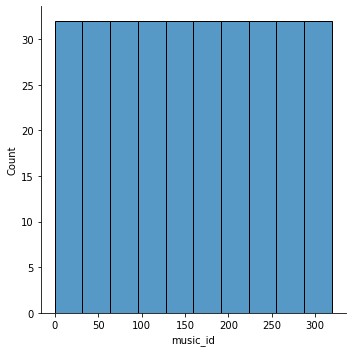

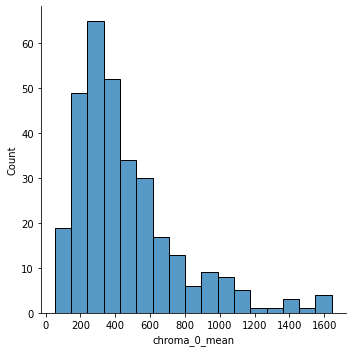

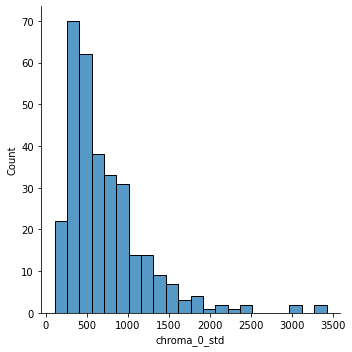

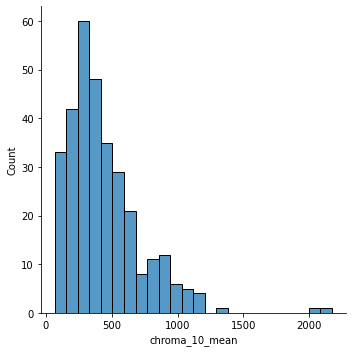

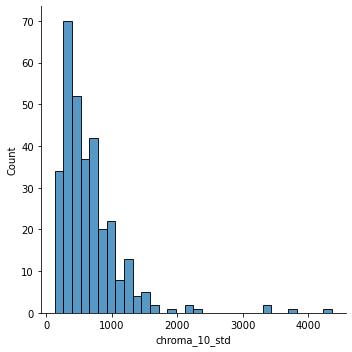

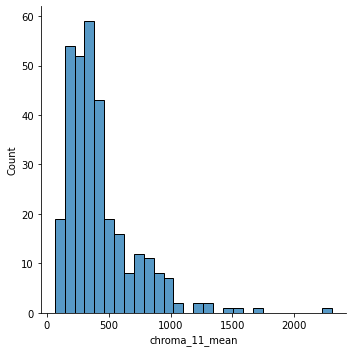

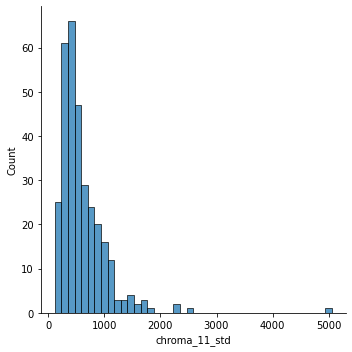

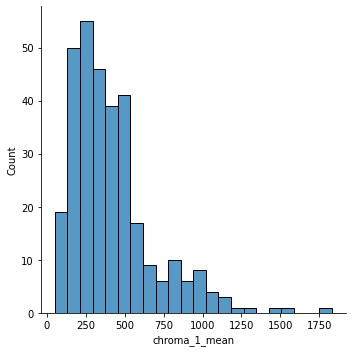

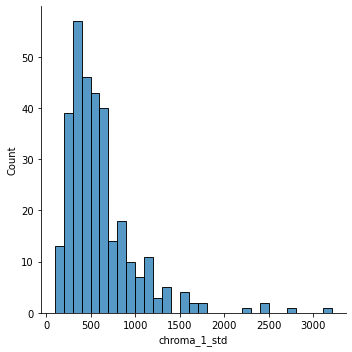

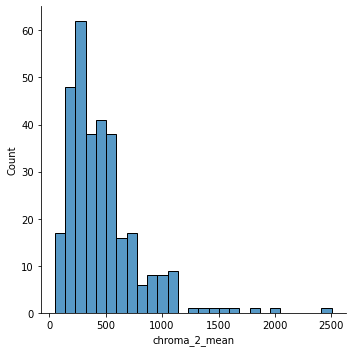

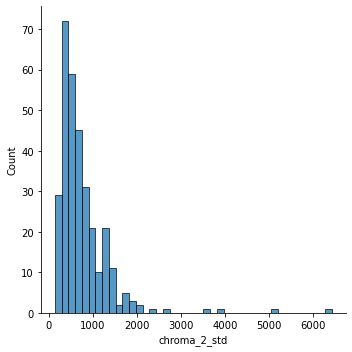

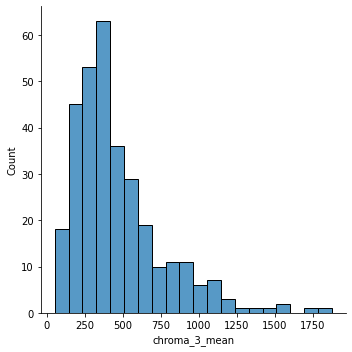

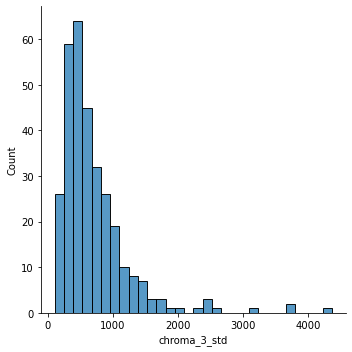

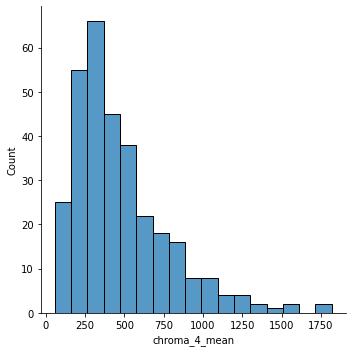

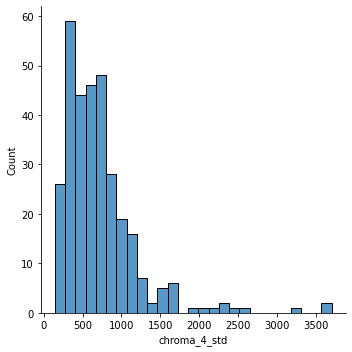

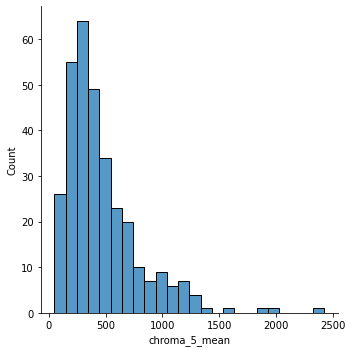

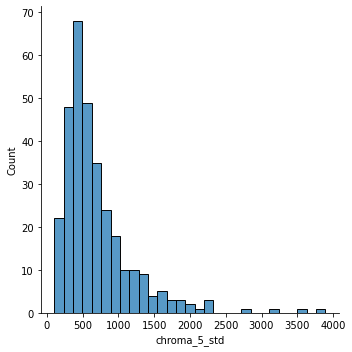

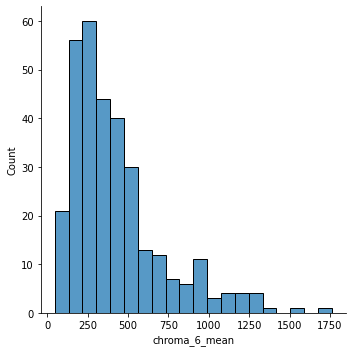

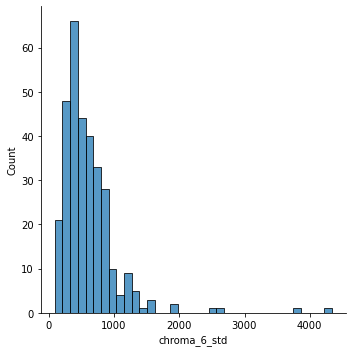

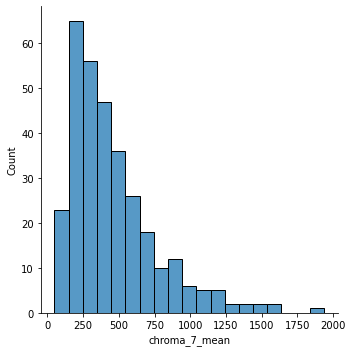

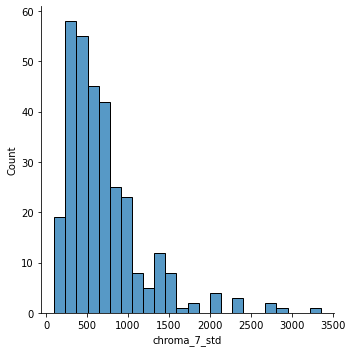

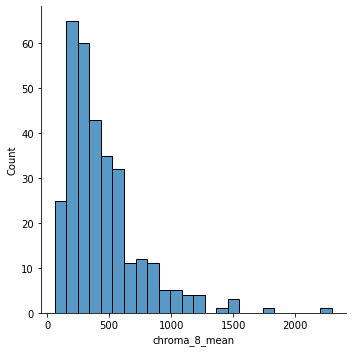

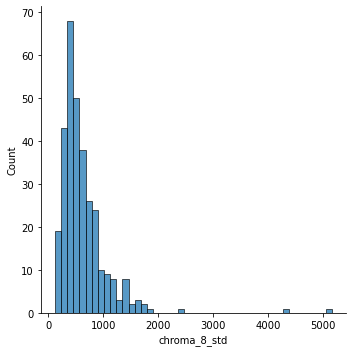

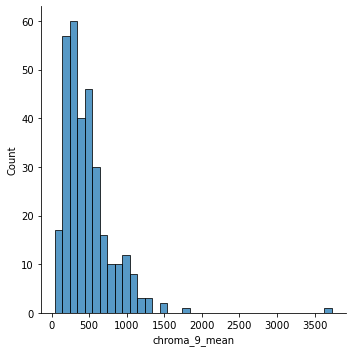

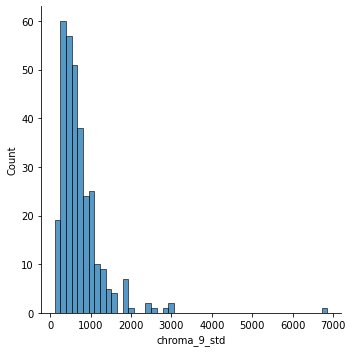

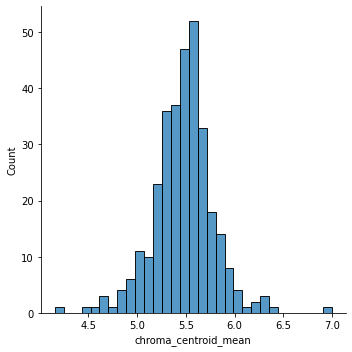

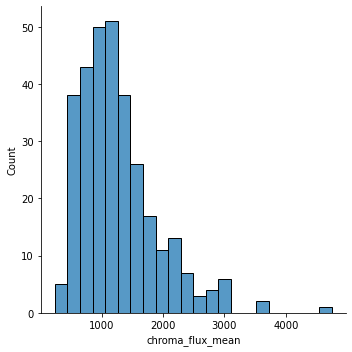

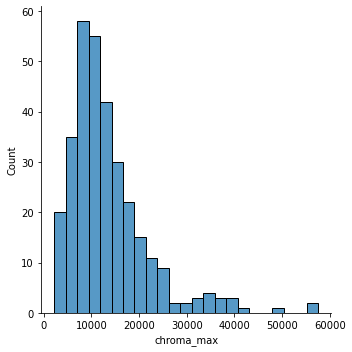

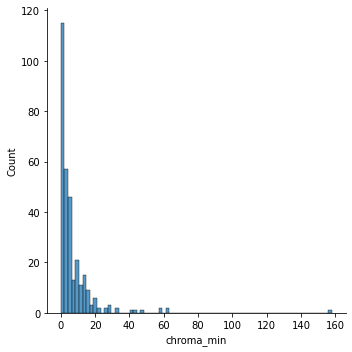

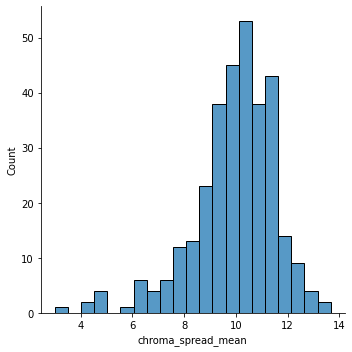

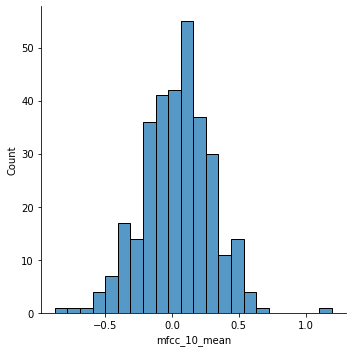

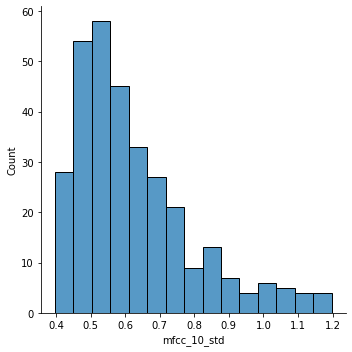

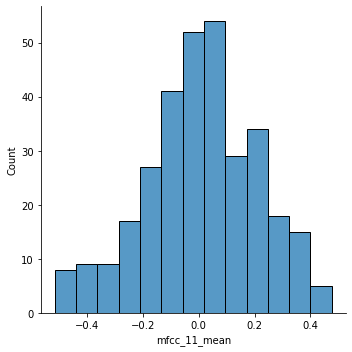

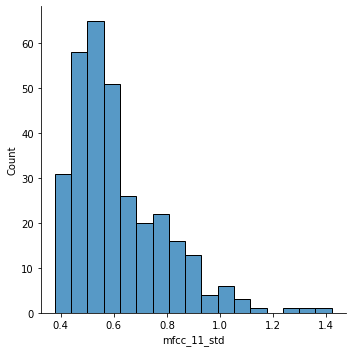

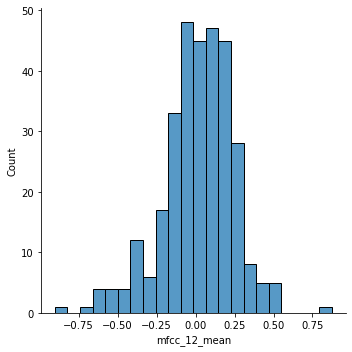

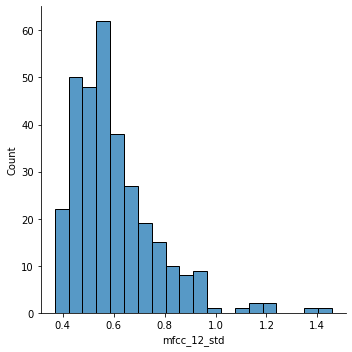

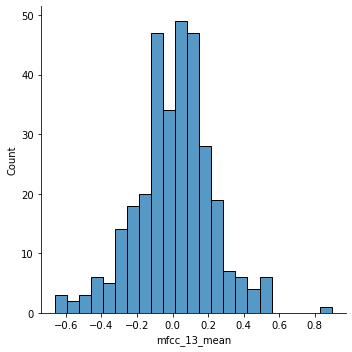

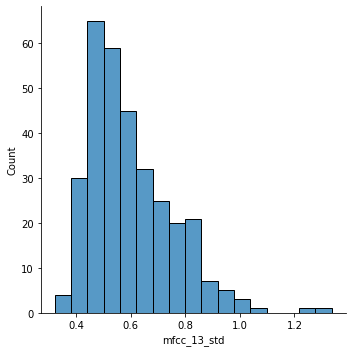

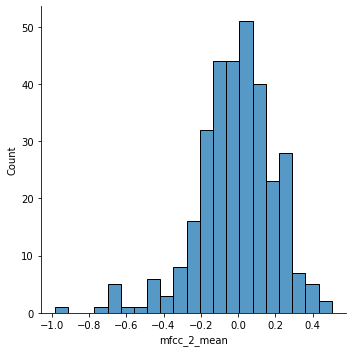

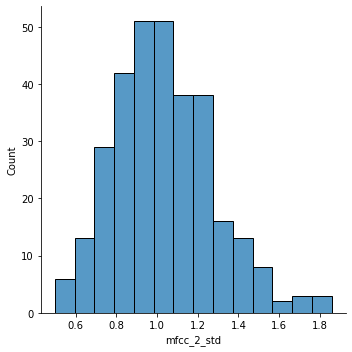

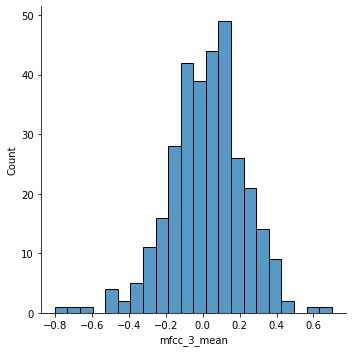

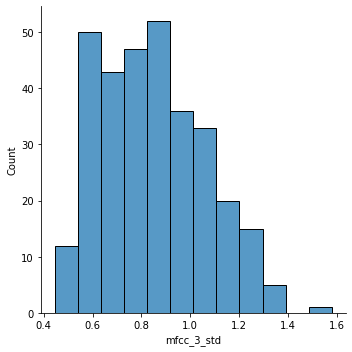

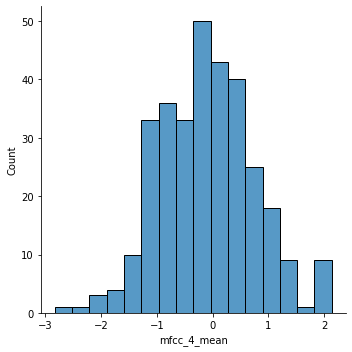

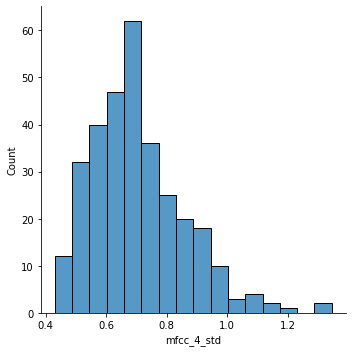

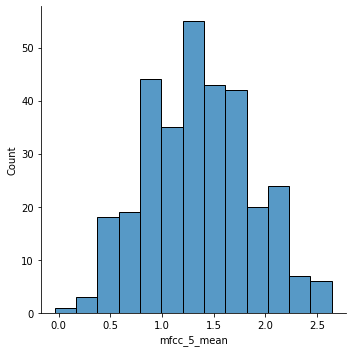

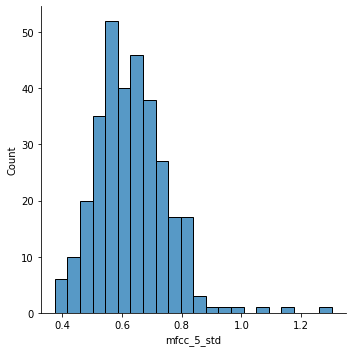

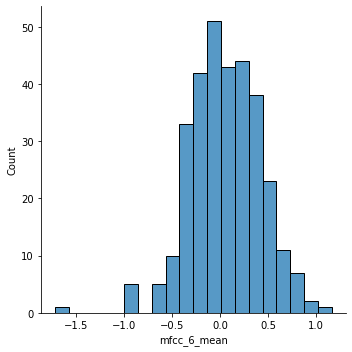

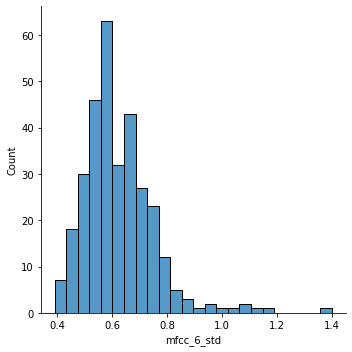

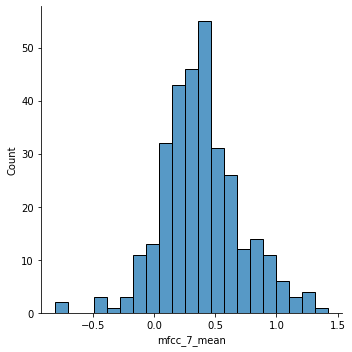

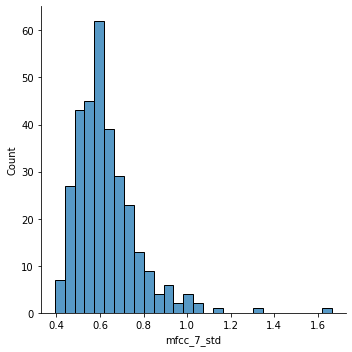

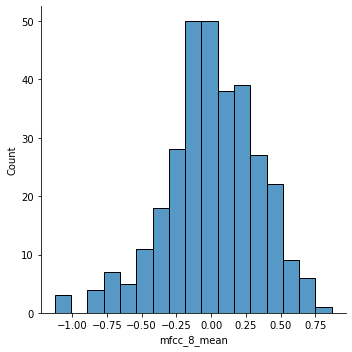

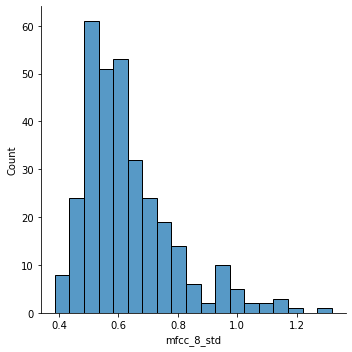

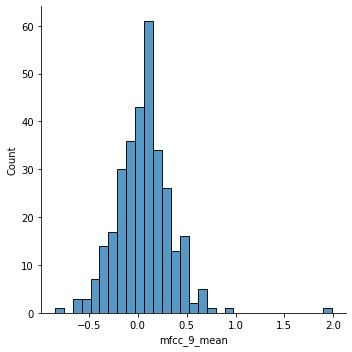

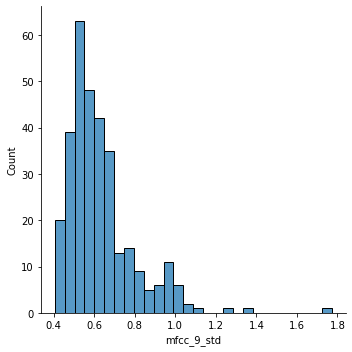

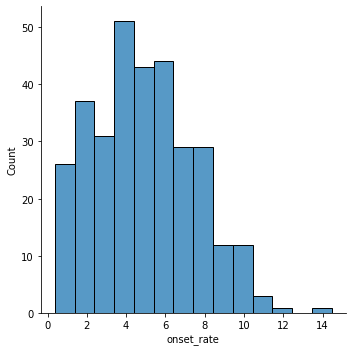

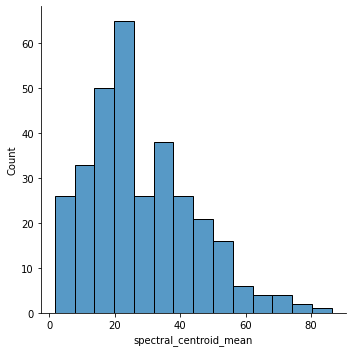

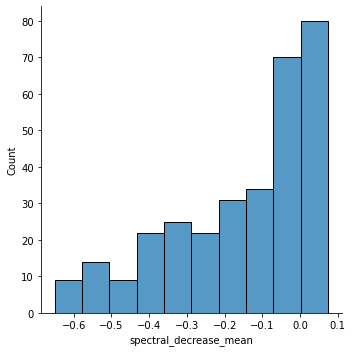

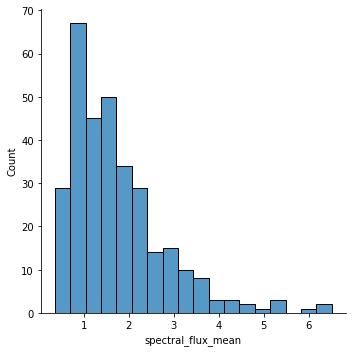

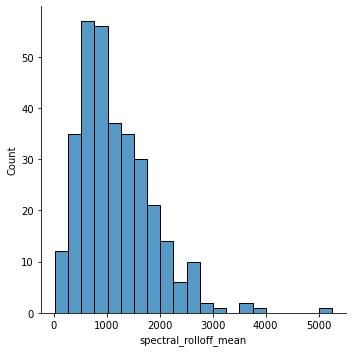

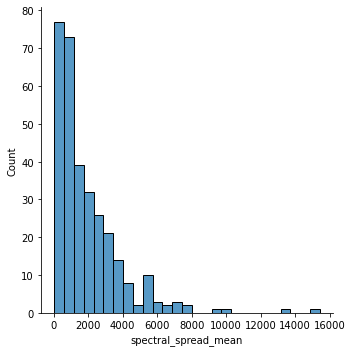

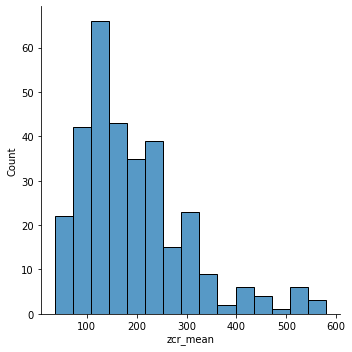

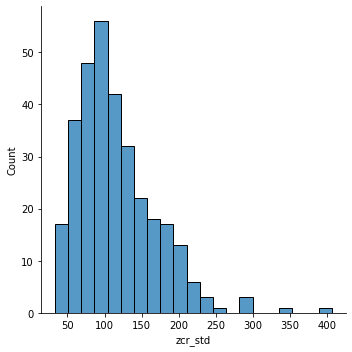

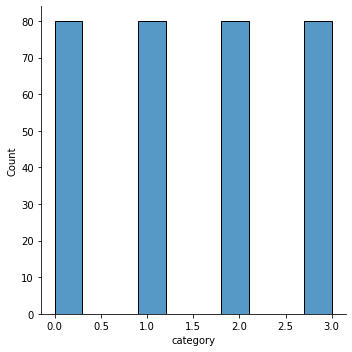

In [901]:
for column in df_train.columns:
    sns.displot(df_train[column])

En regardant la distribution de la variable cible "category", on constate que :
* Le jeu de données est parfaitement équilibré : 25 % de chaque catégorie (0 ,1 ,2 ,3)


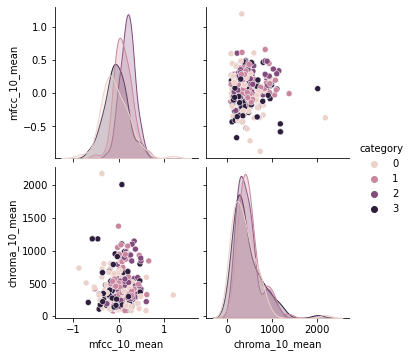

In [902]:
sns.pairplot(df_train[['mfcc_10_mean', 'chroma_10_mean', 'category']], hue='category', height=2.5);


## Détection des NAN

In [1005]:
y = df_train['category']

x = df_train.drop(['music_id','category'], axis=1)

ids_test = df_test['music_id']
df_test = df_test.drop(['music_id'], axis=1)


y = y.to_frame()

df_test


,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
0,232.907440,350.553833,206.571701,331.046967,225.048828,347.441132,221.465195,332.978180,224.200668,347.038422,...,-0.138428,0.572161,8.366616,56.939299,0.046856,1.796432,472.807018,2692.618591,163.125244,115.239277
1,342.126831,615.817993,447.988678,562.143860,413.652649,633.503174,432.197021,668.721008,359.124786,426.877014,...,0.132142,0.684787,4.198134,23.288761,-0.022325,1.785995,1310.964912,1230.997277,170.899800,113.006177
2,92.768356,232.246658,152.421188,268.086456,79.888550,135.265106,75.790894,156.143219,148.015030,304.408112,...,-0.225053,0.602654,0.866282,20.381682,-0.263736,0.476780,1031.578947,1006.524430,81.420967,69.912374
3,219.882584,410.804382,199.726151,305.265564,452.057037,1210.232788,321.175476,815.782837,408.686401,698.333984,...,-0.261579,0.970925,1.965793,32.093015,-0.157930,0.866502,1332.456140,912.472403,148.232375,65.696249
4,215.454269,306.737244,259.520355,343.783783,305.393311,368.144043,238.357651,349.670929,203.332275,340.900879,...,-0.130924,0.526003,4.298090,59.155876,-0.025128,1.741103,1482.894737,4637.320310,225.845447,110.317563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,378.110657,910.296631,411.037994,738.624512,474.921844,1271.251221,370.271271,974.712097,224.349991,471.294678,...,0.543129,0.572005,2.099067,12.647468,-0.208215,1.337591,838.157895,304.780476,83.854556,86.154190
76,298.790619,838.457458,289.558838,651.673340,285.266571,NaN,220.631119,451.879761,316.052155,772.024902,...,0.024739,0.658864,3.098623,9.447293,-0.562238,1.568547,322.368421,1445.712302,192.579308,185.982475
77,340.823334,581.847351,229.372055,268.090668,237.591629,272.746857,344.910767,481.311584,325.790955,439.735168,...,0.337493,0.447563,5.530875,5.660125,-0.490255,0.952766,128.947368,505.899176,111.885235,75.096457
78,461.047760,662.166565,NaN,593.540649,493.840912,541.830078,508.564453,568.137085,1304.457153,1389.750732,...,-0.117043,0.470288,6.186056,33.860030,0.005855,1.481684,1418.421053,1286.331697,233.868235,129.624790


In [1006]:
colonne_sans_nan = []



for col_name in x.columns:
    number_of_isna_rows = x[col_name].isnull().sum()

    if number_of_isna_rows == 0:
        colonne_sans_nan.append(col_name)

    perc_of_nan_values = x[col_name].isna().mean().round(4) * 100
    print('------------' + col_name + '----------- \n')
    print('Pourcentage de valeurs manquantes ou null', perc_of_nan_values)
    print('\n ------------------------------------ \n')

colonne_sans_nan

------------chroma_0_mean----------- 

Pourcentage de valeurs manquantes ou null 0.9400000000000001

 ------------------------------------ 

------------chroma_0_std----------- 

Pourcentage de valeurs manquantes ou null 0.9400000000000001

 ------------------------------------ 

------------chroma_10_mean----------- 

Pourcentage de valeurs manquantes ou null 0.9400000000000001

 ------------------------------------ 

------------chroma_10_std----------- 

Pourcentage de valeurs manquantes ou null 0.9400000000000001

 ------------------------------------ 

------------chroma_11_mean----------- 

Pourcentage de valeurs manquantes ou null 0.62

 ------------------------------------ 

------------chroma_11_std----------- 

Pourcentage de valeurs manquantes ou null 0.0

 ------------------------------------ 

------------chroma_1_mean----------- 

Pourcentage de valeurs manquantes ou null 0.62

 ------------------------------------ 

------------chroma_1_std----------- 

Pourcentage de va

['chroma_11_std', 'spectral_rolloff_mean']

On constate que seules les features chroma_11_std et spectral_rolloff_mean n'ont aucune valeur manquante

In [1007]:
x.isna().sum()

chroma_0_mean            3
chroma_0_std             3
chroma_10_mean           3
chroma_10_std            3
chroma_11_mean           2
                        ..
spectral_flux_mean       4
spectral_rolloff_mean    0
spectral_spread_mean     4
zcr_mean                 4
zcr_std                  3
Length: 61, dtype: int64

In [1008]:
x.isnull().any(axis = 1).sum() / len(x)

0.440625

Malgré le faible taux de valeur manquante sur chaque feature, on voit que 44% des échantillons contiennent au moins 1 valeur manquante.
On ne peut donc pas supprimer les échantillons incomplets.
Nous allons donc utiliser une méthode pour compléter ces valeurs.

## Traitement des NAN - KNN Imputer


In [1009]:
imputer = KNNImputer(n_neighbors=2)

x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)


In [1010]:
x.isna().sum().sum()

0

In [1011]:
x.head()

,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
0,866.507629,1585.437134,415.300842,710.790771,683.865845,1011.552856,473.484100,744.247925,304.914825,363.313141,...,0.156972,0.647313,3.631719,27.621587,-0.186330,1.962404,1525.877193,1579.021838,190.907164,149.482276
1,832.956909,2140.568115,287.584564,281.795380,405.467224,754.076904,1061.359863,2263.894531,2502.509033,6418.287109,...,-0.515713,0.575588,6.230564,38.780628,-0.013198,2.139456,1740.789474,1941.791036,257.913214,171.257592
2,331.544586,553.657532,260.467499,327.618225,283.580139,312.385986,204.369690,225.922531,286.470215,396.768219,...,-0.002418,0.837297,4.264771,86.371120,-0.155013,1.336048,5243.859649,15422.032531,508.122337,296.141124
3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,563.184021,...,0.257047,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996
4,180.331635,245.818512,388.924744,917.082581,186.856262,192.765305,212.240402,370.108063,170.875610,225.814850,...,0.212848,0.487534,4.164816,5.764473,-0.626706,1.263404,21.491228,735.051431,181.818928,106.604597


## Détection des outliers

In [1012]:
def outlier_function(df_train, col_name):
    first_quartile = np.percentile(np.array(df_train[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df_train[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    lower_limit = first_quartile-(3*IQR)
    upper_limit = third_quartile+(3*IQR)
    outlier_count = 0
    valeur = []
    for value in df_train[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
            valeur.append(value)
    return lower_limit, upper_limit, outlier_count, valeur

In [1013]:
def replace_outlier_values(df_train, col_name):
    NOOL_mod_df_train = df_train.copy()

    first_quartile = np.percentile(np.array(df_train[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df_train[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    lower_limit = first_quartile-(3*IQR)
    upper_limit = third_quartile+(3*IQR)
    outlier_count = 0
    valeur = []
    for (index, value) in enumerate(df_train[col_name].tolist()):
        if (value < lower_limit) | (value > upper_limit):
            NOOL_mod_df_train.loc[index,[col_name]] = df_train[col_name].mean()
            outlier_count +=1
            #valeur.append(value)
    print('NUM OF OUTLIER in ' + col_name + ' = ' + str(outlier_count))
    return NOOL_mod_df_train

def delete_outlier_values(x_original, x_train, y_train, col_name):

    x_cleaned = x_train.copy()
    y_cleaned = y_train.copy()

    first_quartile = np.percentile(np.array(x_original[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(x_original[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    lower_limit = first_quartile-(3*IQR)
    upper_limit = third_quartile+(3*IQR)
    outlier_count = 0
    valeur = []
    for index, row in x_train.iterrows():
        if (row[col_name] < lower_limit) | (row[col_name] > upper_limit):
            x_cleaned.drop(index, inplace=True)
            y_cleaned.drop(index, inplace=True)
            outlier_count +=1
    print('NUM OF OUTLIER in ' + col_name + ' = ' + str(outlier_count))
    return x_cleaned, y_cleaned

In [1014]:
len(x)

320

## Suppression des lignes contenant des outliers

In [1015]:
x_original = x.copy()

for col in x.columns:
    x, y = delete_outlier_values(x_original, x, y, col)

print(x.shape, y.shape)

NUM OF OUTLIER in chroma_0_mean = 3
NUM OF OUTLIER in chroma_0_std = 4
NUM OF OUTLIER in chroma_10_mean = 2
NUM OF OUTLIER in chroma_10_std = 3
NUM OF OUTLIER in chroma_11_mean = 4
NUM OF OUTLIER in chroma_11_std = 2
NUM OF OUTLIER in chroma_1_mean = 1
NUM OF OUTLIER in chroma_1_std = 2
NUM OF OUTLIER in chroma_2_mean = 2
NUM OF OUTLIER in chroma_2_std = 2
NUM OF OUTLIER in chroma_3_mean = 3
NUM OF OUTLIER in chroma_3_std = 0
NUM OF OUTLIER in chroma_4_mean = 0
NUM OF OUTLIER in chroma_4_std = 4
NUM OF OUTLIER in chroma_5_mean = 1
NUM OF OUTLIER in chroma_5_std = 3
NUM OF OUTLIER in chroma_6_mean = 1
NUM OF OUTLIER in chroma_6_std = 1
NUM OF OUTLIER in chroma_7_mean = 1
NUM OF OUTLIER in chroma_7_std = 3
NUM OF OUTLIER in chroma_8_mean = 1
NUM OF OUTLIER in chroma_8_std = 0
NUM OF OUTLIER in chroma_9_mean = 1
NUM OF OUTLIER in chroma_9_std = 2
NUM OF OUTLIER in chroma_centroid_mean = 1
NUM OF OUTLIER in chroma_flux_mean = 0
NUM OF OUTLIER in chroma_max = 0
NUM OF OUTLIER in chroma_min 

## Normaliser les données
Choisir une méthode de normalisation, comparer les résultats obtenus avec différentes méthodes

# Sans scaling


In [845]:
x_scaled = x.copy()



0

# StandarScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [1016]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

df_test

,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
0,-0.808798,-0.693971,-0.786603,-0.694526,-0.776725,-0.734491,-0.726080,-0.684360,-0.729567,-0.803574,...,-0.801459,-0.343798,1.390235,1.928691,1.059368,0.102697,-1.281666,0.492680,-0.290467,0.078817
1,-0.480490,-0.240280,0.015651,-0.121743,-0.091445,0.175350,0.026672,0.163549,-0.275707,-0.553058,...,0.288850,0.147874,-0.291369,-0.366918,0.625851,0.092619,0.259891,-0.387699,-0.226643,0.029842
2,-1.230048,-0.896317,-0.966551,-0.850576,-1.304156,-1.409333,-1.246441,-1.130951,-0.985842,-0.937339,...,-1.150528,-0.210681,-1.635468,-0.565236,-0.886931,-1.171523,-0.253962,-0.522906,-0.961198,-0.915264
3,-0.847950,-0.590923,-0.809352,-0.758426,0.048095,2.009681,-0.369906,0.534950,-0.108991,0.298717,...,-1.297717,1.397012,-1.191916,0.233701,-0.223903,-0.795218,0.299418,-0.579556,-0.412726,-1.007730
4,-0.861261,-0.768913,-0.610649,-0.662957,-0.484799,-0.668644,-0.665738,-0.642202,-0.799765,-0.822833,...,-0.771220,-0.545300,-0.251046,2.079904,0.608290,0.049273,0.576107,1.664033,0.224419,-0.029123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.372325,0.263378,-0.107140,0.315671,0.131173,2.203754,-0.194532,0.936321,-0.729065,-0.413685,...,1.944988,-0.344477,-1.138152,-1.092857,-0.539008,-0.340347,-0.609706,-0.945588,-0.941220,-0.559059
76,-0.610756,0.140509,-0.510828,0.100159,-0.557928,-0.277031,-0.729059,-0.384077,-0.420596,0.529944,...,-0.143949,0.034705,-0.734922,-1.311170,-2.757468,-0.117342,-1.558356,-0.258370,-0.048671,1.630313
77,-0.484408,-0.298381,-0.710835,-0.850565,-0.731152,-0.972062,-0.285122,-0.309748,-0.387836,-0.512712,...,1.116345,-0.887731,0.246271,-1.569527,-2.306392,-0.711923,-1.914100,-0.824448,-0.711109,-0.801570
78,-0.123020,-0.161008,-0.010839,-0.043925,0.199914,-0.116223,0.299463,-0.090473,2.904218,2.468237,...,-0.715284,-0.788528,0.510577,0.354245,0.802444,-0.201214,0.457526,-0.354370,0.290280,0.394311


# MinMaxScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

In [523]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Robust Scaler :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html


In [528]:
scaler = RobustScaler()
scaler.fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

## Etudier l’opportunité d’une réduction de dimension
- Tester les perfs obtenus pour différentes valeurs
- Visualiser la variance expliquée par chaque axe
- Justifier le nombre d’axes retenus

### Boite à outils
Analyse en composante principale : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## SANS Features selection


In [ ]:
x_features_selected = x_scaled.copy()

## PCA

In [79]:
pca = PCA(n_components=20)
# Fit du PCA sur les données d'entrée
pca.fit(x_scaled)
# Transformation des valeurs d'entrée des jeux de test et d'entrainement
x_features_selected = pca.transform(x_scaled)

Le nombre de n_components semble être autour de 20.
On observe que la PCA nous donne des résultats plus faibles que la régularisation L1,

In [33]:
#explained_variance_ratio = pca.explained_variance_ratio_

## Régularisation L1 via LinearSVC
On constate que l'utilisation de cette regularisation est efficace pour un C (invers de la force de régul.) approchant la valeur 0.1.

Valeurs testées:

* 0.010 => 16 features
* 0.007 => 8 features
* **0.1 => 47 features** - SVC acc val = environ 90%
* **0.09 => 48 features** - SVC acc val = environ 92%


In [1017]:
lsvc = LinearSVC(C=0.08, penalty="l1", dual=False).fit(x_scaled, y)
model = SelectFromModel(lsvc, prefit=True)
feature_idx = model.get_support()

feature_name = x_scaled.columns[feature_idx]

x_features_selected = model.transform(x_scaled)

x_features_selected = pd.DataFrame(x_features_selected, columns=feature_name)

x_features_selected.shape



df_test = df_test[feature_name]

df_test




/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,chroma_0_std,chroma_10_std,chroma_11_std,chroma_1_std,chroma_2_std,chroma_3_mean,chroma_3_std,chroma_4_mean,chroma_4_std,chroma_5_std,...,mfcc_8_mean,mfcc_8_std,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_spread_mean,zcr_std
0,-0.693971,-0.694526,-0.734491,-0.684360,-0.803574,-0.717368,-0.637541,-0.748621,-0.714711,-0.487836,...,0.943190,-0.497285,-0.801459,-0.343798,1.390235,1.928691,1.059368,0.102697,0.492680,0.078817
1,-0.240280,-0.121743,0.175350,0.163549,-0.553058,0.068415,0.144377,0.607030,0.888775,-0.278582,...,0.362710,-0.158113,0.288850,0.147874,-0.291369,-0.366918,0.625851,0.092619,-0.387699,0.029842
2,-0.896317,-0.850576,-1.409333,-1.130951,-0.937339,-0.926659,-0.777027,-1.217061,-1.078570,-0.188825,...,-1.536736,-0.477853,-1.150528,-0.210681,-1.635468,-0.565236,-0.886931,-1.171523,-0.522906,-0.915264
3,-0.590923,-0.758426,2.009681,0.534950,0.298717,-0.759882,-0.728578,-0.696300,-0.690034,-0.926964,...,-0.644081,0.358031,-1.297717,1.397012,-1.191916,0.233701,-0.223903,-0.795218,-0.579556,-1.007730
4,-0.768913,-0.662957,-0.668644,-0.642202,-0.822833,-0.610634,-0.541576,-0.611710,-0.400727,-0.521681,...,0.352071,-0.685006,-0.771220,-0.545300,-0.251046,2.079904,0.608290,0.049273,1.664033,-0.029123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.263378,0.315671,2.203754,0.936321,-0.413685,-0.815384,-0.675661,-0.685848,-0.400960,0.050637,...,0.091219,-0.195960,1.944988,-0.344477,-1.138152,-1.092857,-0.539008,-0.340347,-0.945588,-0.559059
76,0.140509,0.100159,-0.277031,-0.384077,0.529944,-0.543032,0.276390,-0.609922,-0.048146,-0.303507,...,-0.264924,1.360150,-0.143949,0.034705,-0.734922,-1.311170,-2.757468,-0.117342,-0.258370,1.630313
77,-0.298381,-0.850565,-0.972062,-0.309748,-0.512712,-0.580459,-0.617718,-0.746946,-0.774750,-0.766781,...,1.545420,-0.762984,1.116345,-0.887731,0.246271,-1.569527,-2.306392,-0.711923,-0.824448,-0.801570
78,-0.161008,-0.043925,-0.116223,-0.090473,2.468237,1.384732,0.393940,0.393781,0.349405,0.513954,...,-0.803575,-0.747269,-0.715284,-0.788528,0.510577,0.354245,0.802444,-0.201214,-0.354370,0.394311


## Régularisation L2 via LogisticRegression

In [585]:
print(x_scaled.shape)

logreg = LogisticRegression(C=0.1, penalty='l2').fit(x_scaled, y)
model = SelectFromModel(logreg, prefit=True)
feature_idx = model.get_support()
feature_name = x_scaled.columns[feature_idx]

x_features_selected = model.transform(x_scaled)

x_features_selected = pd.DataFrame(x_features_selected, columns=feature_name)

x_features_selected.shape


(256, 61)


/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(256, 25)

## Visualisation de la corrélation entre les features sélectionnées

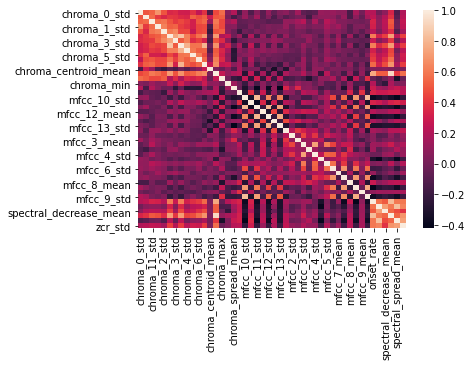

In [937]:
sns.heatmap(x_features_selected.corr());

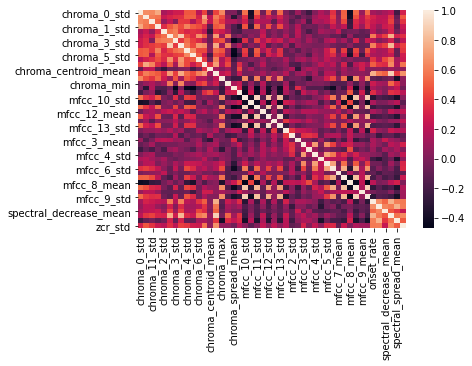

In [938]:
sns.heatmap(df_test.corr());

## Créer un échantillon non biaisé de validation

In [968]:
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x_features_selected, y, test_size=0.20, random_state=0)


<table>
  <tr>
    <th>Model</th>
    <th>Num_Essai</th>
    <th>Supr_Nan</th>
    <th>Supr_Outliers</th>
    <th>PCA</th>
    <th>Normalize</th>
    <th>Lasso</th>
    <th>%Train</th>
    <th>%Test</th>
  </tr>
  <tr>
      <td colspan="2" style="height:2px; background-color:#000000;color:white;">StandarScaler + L1</td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>1</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LinearSVC (L1)</td>
    <td style="color:green;">0.98</td>
    <td style="color:green;">0.92</td>
  </tr>
  <tr>
    <td>LogisticRegression</td>
    <td>1</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LinearSVC</td>
    <td>0.99</td>
    <td>0.80</td>
  </tr>
  <tr>
    <td>Linear SVC</td>
    <td>1</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LinearSVC (L1)</td>
    <td style="color: red;">1.0</td>
    <td>0.84</td>
  </tr>
  <tr>
    <td>RandomForestClassifier</td>
    <td>1</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.99</td>
    <td>0.88</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>1</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.85</td>
    <td>0.74</td>
  </tr>
  <tr>
      <td colspan="2" style="height:2px; background-color:#000000;color:white;">StandarScaler + L2</td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>2</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LogisticRegression(L2)</td>
    <td>0.96</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>LogisticRegression</td>
    <td>2</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LogisticRegression(L2)</td>
    <td>0.93</td>
    <td>0.87</td>
  </tr>
  <tr>
    <td>Linear SVC</td>
    <td>2</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LinearSVC (L1)</td>
    <td>0.92</td>
    <td>0.87</td>
  </tr>
  <tr>
    <td>RandomForestClassifier</td>
    <td>2</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LogisticRegression(L2)</td>
    <td>0.99</td>
    <td>0.68</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>2</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Non</td>
    <td>StandarScaler</td>
    <td>LogisticRegression(L2)</td>
    <td>0.91</td>
    <td>0.71</td>
  </tr>
  <tr>
      <td colspan="2" style="height:2px; background-color:#000000;color:white;">StandarScaler + PCA</td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>3</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>StandarScaler</td>
    <td>Non</td>
    <td>0.98</td>
    <td>0.70</td>
  </tr>
  <tr>
    <td>LogisticRegression</td>
    <td>3</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>StandarScaler</td>
    <td>Non</td>
    <td>0.91</td>
    <td>0.84</td>
  </tr>
  <tr>
    <td>Linear SVC</td>
    <td>3</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>StandarScaler</td>
    <td>Non</td>
    <td>0.87</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>RandomForestClassifier</td>
    <td>3</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>StandarScaler</td>
    <td>Non</td>
    <td>0.98</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>3</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>StandarScaler</td>
    <td>Non</td>
    <td>0.85</td>
    <td>0.68</td>
  </tr>
  <tr>
      <td colspan="2" style="height:2px; background-color:#000000;color:white;">MinMaxScaler + L1</td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>4</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>MinMaxScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.80</td>
    <td>0.67</td>
  </tr>
  <tr>
    <td>LogisticRegression</td>
    <td>4</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>MinMaxScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.91</td>
    <td>0.84</td>
  </tr>
  <tr>
    <td>Linear SVC</td>
    <td>4</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>MinMaxScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.88</td>
    <td>0.84</td>
  </tr>
  <tr>
    <td>RandomForestClassifier</td>
    <td>4</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>MinMaxScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.85</td>
    <td>0.78</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>4</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>MinMaxScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.89</td>
    <td>0.71</td>
  </tr>
  <tr>
      <td colspan="2" style="height:2px; background-color:#000000;color:white;">RobusteScaler + L1</td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
      <td colspan="2" style="height:2px; background-color:#000000;"></td>
  </tr>
  <tr>
    <td>SVC</td>
    <td>5</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>RobusteScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.94</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>LogisticRegression</td>
    <td>5</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>RobusteScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.98</td>
    <td>0.75</td>
  </tr>
  <tr>
    <td>Linear SVC</td>
    <td>5</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>MinMaxScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.98</td>
    <td>0.87</td>
  </tr>
  <tr>
    <td>RandomForestClassifier</td>
    <td>5</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>RobusteScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.99</td>
    <td>0.71</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>5</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>Oui</td>
    <td>RobusteScaler</td>
    <td>LinearSVC(L1)</td>
    <td>0.86</td>
    <td>0.75</td>
  </tr>
</table>

## Entrainer différents algorithmes de classification

## SVC

In [ ]:
model = make_pipeline(SVC(gamma='auto'))
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))


print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))


print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')



y_final_predict = model.predict(df_test)

print(len(y_final_predict))

y_final_predict

ids_test

output = pd.DataFrame({'music_id': ids_test,'prediction': y_final_predict})
output.to_csv('td-ml-elective3.csv', index=False)



## Entrainer différents algorithmes de classification

## SVC

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


------ TRAINING ACCURACY -------
0.9852941176470589
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9887640449438202
PRECISION SUR LA CATEGORIE 1 = 0.983050847457627
PRECISION SUR LA CATEGORIE 2 = 0.975609756097561
PRECISION SUR LA CATEGORIE 3 = 1.0
------ VALIDATION ACCURACY -------
0.9230769230769231
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9333333333333333
PRECISION SUR LA CATEGORIE 1 = 0.8750000000000001
PRECISION SUR LA CATEGORIE 2 = 0.9333333333333333
PRECISION SUR LA CATEGORIE 3 = 0.9285714285714286
80


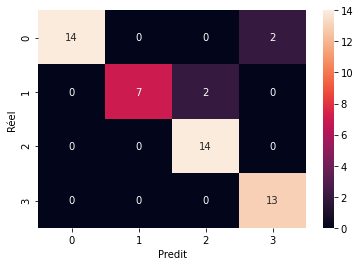

In [970]:
model = make_pipeline(SVC(gamma='auto'))
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))


print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))


print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')



y_final_predict = model.predict(df_test)

print(len(y_final_predict))

y_final_predict

ids_test

output = pd.DataFrame({'music_id': ids_test,'prediction': y_final_predict})
output.to_csv('td-ml-elective3.csv', index=False)



## Linear SVC

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


------ TRAINING ACCURACY -------
1.0
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 1.0
PRECISION SUR LA CATEGORIE 1 = 1.0
PRECISION SUR LA CATEGORIE 2 = 1.0
PRECISION SUR LA CATEGORIE 3 = 1.0
------ VALIDATION ACCURACY -------
0.8461538461538461
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.787878787878788
PRECISION SUR LA CATEGORIE 1 = 0.9
PRECISION SUR LA CATEGORIE 2 = 0.923076923076923
PRECISION SUR LA CATEGORIE 3 = 0.8


/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(33.0, 0.5, 'Réel')

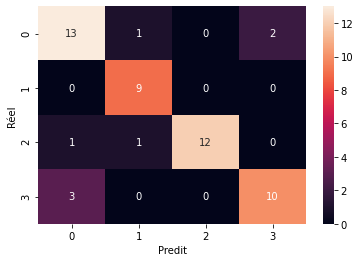

In [691]:
model = make_pipeline(LinearSVC(penalty="l1", dual=False))
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))


print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))



print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')

## RandomForestClassifier
On a joué ici sur les params n_estimators (nb d'arbres) et max_depth (profondeur de chaque arbre)
De trop grandes valeurs conduisent à un overfitting.
Valeurs choisies n_estimators = 500 / max_depth = 5

<ipython-input-697-924c279baf5e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


------ TRAINING ACCURACY -------
0.9901960784313726
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 1.0
PRECISION SUR LA CATEGORIE 1 = 0.9833333333333333
PRECISION SUR LA CATEGORIE 2 = 0.9833333333333333
PRECISION SUR LA CATEGORIE 3 = 1.0
------ VALIDATION ACCURACY -------
0.8846153846153846
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9696969696969697
PRECISION SUR LA CATEGORIE 1 = 0.6666666666666667
PRECISION SUR LA CATEGORIE 2 = 0.8387096774193549
PRECISION SUR LA CATEGORIE 3 = 0.9600000000000001


Text(33.0, 0.5, 'Réel')

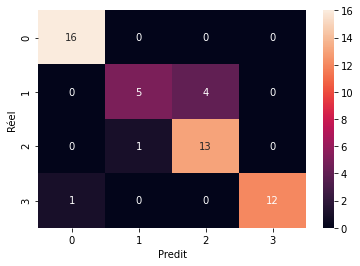

In [697]:
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))

print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))




print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')

## LogisticRegression

------ TRAINING ACCURACY -------
0.9950980392156863
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9887640449438202
PRECISION SUR LA CATEGORIE 1 = 1.0
PRECISION SUR LA CATEGORIE 2 = 1.0
PRECISION SUR LA CATEGORIE 3 = 0.9873417721518987
------ VALIDATION ACCURACY -------
0.8076923076923077
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.787878787878788
PRECISION SUR LA CATEGORIE 1 = 0.8888888888888888
PRECISION SUR LA CATEGORIE 2 = 0.8275862068965518
PRECISION SUR LA CATEGORIE 3 = 0.7500000000000001


/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(33.0, 0.5, 'Réel')

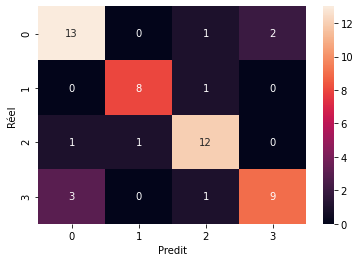

In [698]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))

print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))




print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')


## KNN

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


------ TRAINING ACCURACY -------
0.8676470588235294
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9230769230769231
PRECISION SUR LA CATEGORIE 1 = 0.8281250000000001
PRECISION SUR LA CATEGORIE 2 = 0.9032258064516129
PRECISION SUR LA CATEGORIE 3 = 0.8
------ VALIDATION ACCURACY -------
0.7307692307692307
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.8484848484848485
PRECISION SUR LA CATEGORIE 1 = 0.5714285714285715
PRECISION SUR LA CATEGORIE 2 = 0.8387096774193549
PRECISION SUR LA CATEGORIE 3 = 0.5263157894736842


Text(33.0, 0.5, 'Réel')

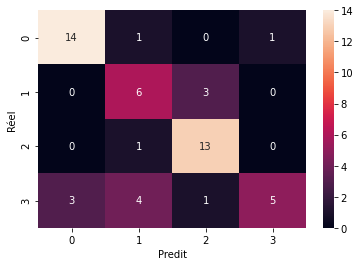

In [699]:

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))

print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))




print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')

## Comparer la performance de différents algorithmes
Faire des prédictions et evaluer leur justesse de ces prédictions à l'aide de différents indicateurs :
- Matrice de confusion
- Accuracy
- F-Score

### Boite à outils
Un rapport de performance clé en main : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Liste des différents indicateurs : https://scikit-learn.org/stable/modules/model_evaluation.html

Faire une prédiction avec un model sklearn entrainé :
`y_pred_1 = model_1.predict(X_val, y_val)`





## Optimiser les hyper-paramètres de l’algorithme retenu
Tester différents hyper-paramètres pour tirer au mieux partit de l'algorithme retenu

### Boite à outils
GridSearchCV :  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Remarques :

GridSearchCV ne nous donne pas de bons resultats, ceci est peut etre lié à la méthode utilisée en interne (cross-validation).
Compte tenu du faible volume de données (256 echantillons), la cross validation se fait sur des sous ensemble certainement trop petits.
Nous obtenons de meilleurs résultats avec C=1, gamma="auto" et kernel="rbf"

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/caiuspupus/Projects/Ynov/ml-elective3/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConv

------ TRAINING ACCURACY -------
0.9754901960784313
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9662921348314608
PRECISION SUR LA CATEGORIE 1 = 0.983050847457627
PRECISION SUR LA CATEGORIE 2 = 0.9836065573770492
PRECISION SUR LA CATEGORIE 3 = 0.9620253164556962
------ VALIDATION ACCURACY -------
0.8269230769230769
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9032258064516129
PRECISION SUR LA CATEGORIE 1 = 0.7777777777777778
PRECISION SUR LA CATEGORIE 2 = 0.7857142857142857
PRECISION SUR LA CATEGORIE 3 = 0.8148148148148148
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


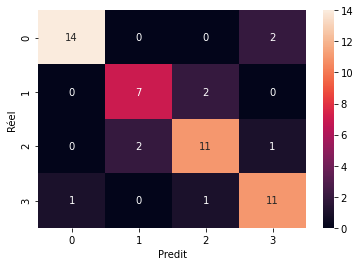

In [917]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr'],
    'gamma': ['scale', 'auto']

}

#parameters = {'kernel':['rbf'], 'C': [1]}
svc = SVC()
model = GridSearchCV(svc, parameters)
model.fit(X_train, y_train)


y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))


print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))


print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')

print(model.best_params_)




## Prédire des valeurs pour le jeu de test
Créer un fichier au format .csv contenant  vos prédictions.
En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.

Vérifier que votre notebook fonctionne avant de le rendre

### Boite à outils
exporter un dataFrame pandas au format csv :
`df_test.to_csv('data/test.csv' , sep=',', decimal='.')`